In [1]:
!python -m nltk.downloader all

/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /roo

In [2]:
! pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.2.2)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
import category_encoders 
from category_encoders.binary import BinaryEncoder
from datetime import datetime
import time
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
import calendar

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [9]:
del df['Unnamed: 0'] 
df

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...
420,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


In [10]:
df.describe()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
count,425,425,425,425,425,425,425,425,425,425
unique,287,3,12,3,5,6,2,3,33,411
top,2017-02-08 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,On 02/03/17 during the soil sampling in the re...
freq,6,251,90,241,316,143,403,189,232,3


In [11]:
for i in range (0, df.shape[1]):
    print("Data type of feature/column ", df.columns[i]," is: ",type(df.iloc[1,i]))

Data type of feature/column  Data  is:  <class 'str'>
Data type of feature/column  Countries  is:  <class 'str'>
Data type of feature/column  Local  is:  <class 'str'>
Data type of feature/column  Industry Sector  is:  <class 'str'>
Data type of feature/column  Accident Level  is:  <class 'str'>
Data type of feature/column  Potential Accident Level  is:  <class 'str'>
Data type of feature/column  Genre  is:  <class 'str'>
Data type of feature/column  Employee or Third Party  is:  <class 'str'>
Data type of feature/column  Critical Risk  is:  <class 'str'>
Data type of feature/column  Description  is:  <class 'str'>


In [12]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(df)

,Total,Percent
Description,0,0.0
Critical Risk,0,0.0
Employee or Third Party,0,0.0
Genre,0,0.0
Potential Accident Level,0,0.0
Accident Level,0,0.0
Industry Sector,0,0.0
Local,0,0.0
Countries,0,0.0
Data,0,0.0


In [13]:
dataframe=df.copy()
y=dataframe['Accident Level'].values
# del dataframe['Accident Level']

In [14]:
categorical_columns=dataframe.columns
categorical_columns

Index(['Data', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Genre', 'Employee or Third Party',
       'Critical Risk', 'Description'],
      dtype='object')

# **# UNIVARIATE ANALYSIS**

> Performing Univariate Analysis on each Feature



Pre-Processing Features for Univariate Analysis

In [15]:
# pd.DataFrame(accident_level_encoded).value_counts()

In [16]:
datetime_object=[]
for i in range(0,len(dataframe)):
  datetime_object.append(datetime.strptime((dataframe[categorical_columns[0]][i]), '%Y-%m-%d %H:%M:%S'))
unix_time=[]
for i in datetime_object:
  unix_time.append(time.mktime(i.timetuple()))

dataframe['Unix Time']=unix_time
dataframe['Date of Incidents']= datetime_object

In [17]:
univariate_analysis_columns=list(dataframe.columns).copy()
univariate_analysis_columns.remove('Unix Time')
univariate_analysis_columns.remove('Description')
univariate_analysis_columns.remove('Accident Level')
univariate_analysis_columns.remove('Data')
univariate_analysis_columns

['Countries',
 'Local',
 'Industry Sector',
 'Potential Accident Level',
 'Genre',
 'Employee or Third Party',
 'Critical Risk',
 'Date of Incidents']

Feature: Accident Level (Target Column(Y)

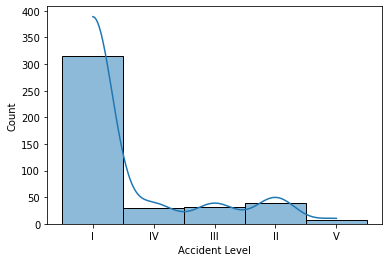

In [18]:
sns.histplot(dataframe['Accident Level'],kde=True)

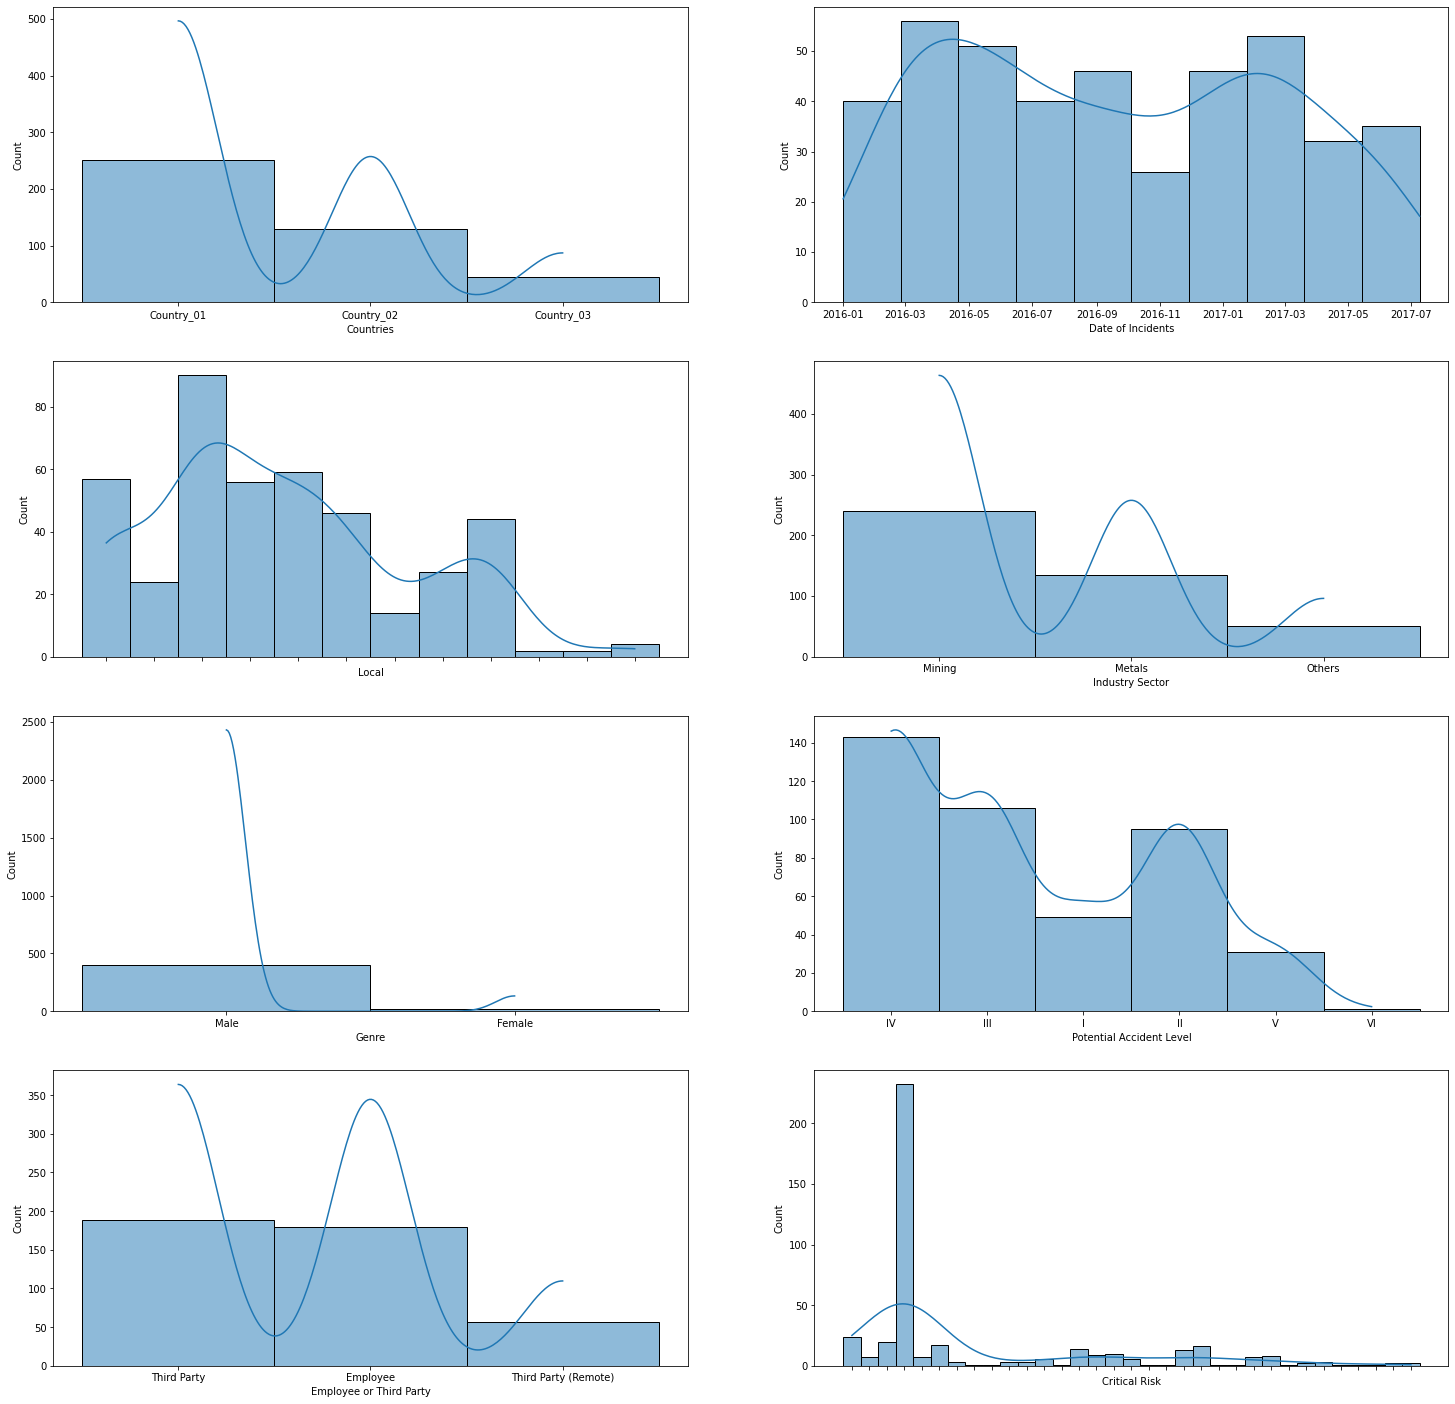

In [19]:
fig,ax = plt.subplots(int(len(univariate_analysis_columns)/2),int(len(univariate_analysis_columns)/4),figsize=(25,25))
c1=0
c2=0
flag=0
for i in range(0,len(univariate_analysis_columns)): 
  g=sns.histplot(dataframe[univariate_analysis_columns[i]],ax=ax[c1,c2],kde=True)
  ax[c1,c2].set_xlabel(univariate_analysis_columns[i])
  if univariate_analysis_columns[i]== 'Local' or univariate_analysis_columns[i]== 'Critical Risk':
    g.set_xticklabels(ax[c1,c2].get_xticklabels(),rotation=60)
  if flag==0:
    c1=c1+1
    c1=c1%4
    flag=1
  else:
    c2=c2+1
    c2=c2%2
    flag=0

# **# BIVARIATE ANALYSIS**

> Performing Bivariate Analysis on combination of input and output feature

> Performing Bivariate Analysis on combination of multiple input features




Pre-Processing Features for Bivariate Analysis

In [20]:
dataframe['Year of Incident']=[i.year for i in dataframe['Date of Incidents']]
dataframe['Month of Incident']=[i.month for i in dataframe['Date of Incidents']]
dataframe['Date of Incident']=[i.day for i in dataframe['Date of Incidents']]
dataframe['Day of Incident']=[calendar.day_name[i.weekday()] for i in dataframe['Date of Incidents']]

In [21]:
bivariate_analysis_columns=list(dataframe.columns).copy()
bivariate_analysis_columns.remove('Unix Time')
bivariate_analysis_columns.remove('Description')
bivariate_analysis_columns.remove('Accident Level')
bivariate_analysis_columns.remove('Data')
bivariate_analysis_columns.remove('Date of Incidents')
bivariate_analysis_columns.sort()
bivariate_analysis_columns

['Countries',
 'Critical Risk',
 'Date of Incident',
 'Day of Incident',
 'Employee or Third Party',
 'Genre',
 'Industry Sector',
 'Local',
 'Month of Incident',
 'Potential Accident Level',
 'Year of Incident']

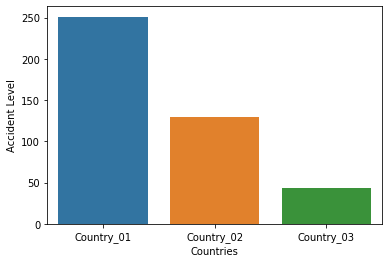

In [22]:
sns.barplot(x=bivariate_analysis_columns[0], y='Accident Level',data=dataframe.groupby(bivariate_analysis_columns[0]).count().reset_index())

Relation between Other Features and Accident Level

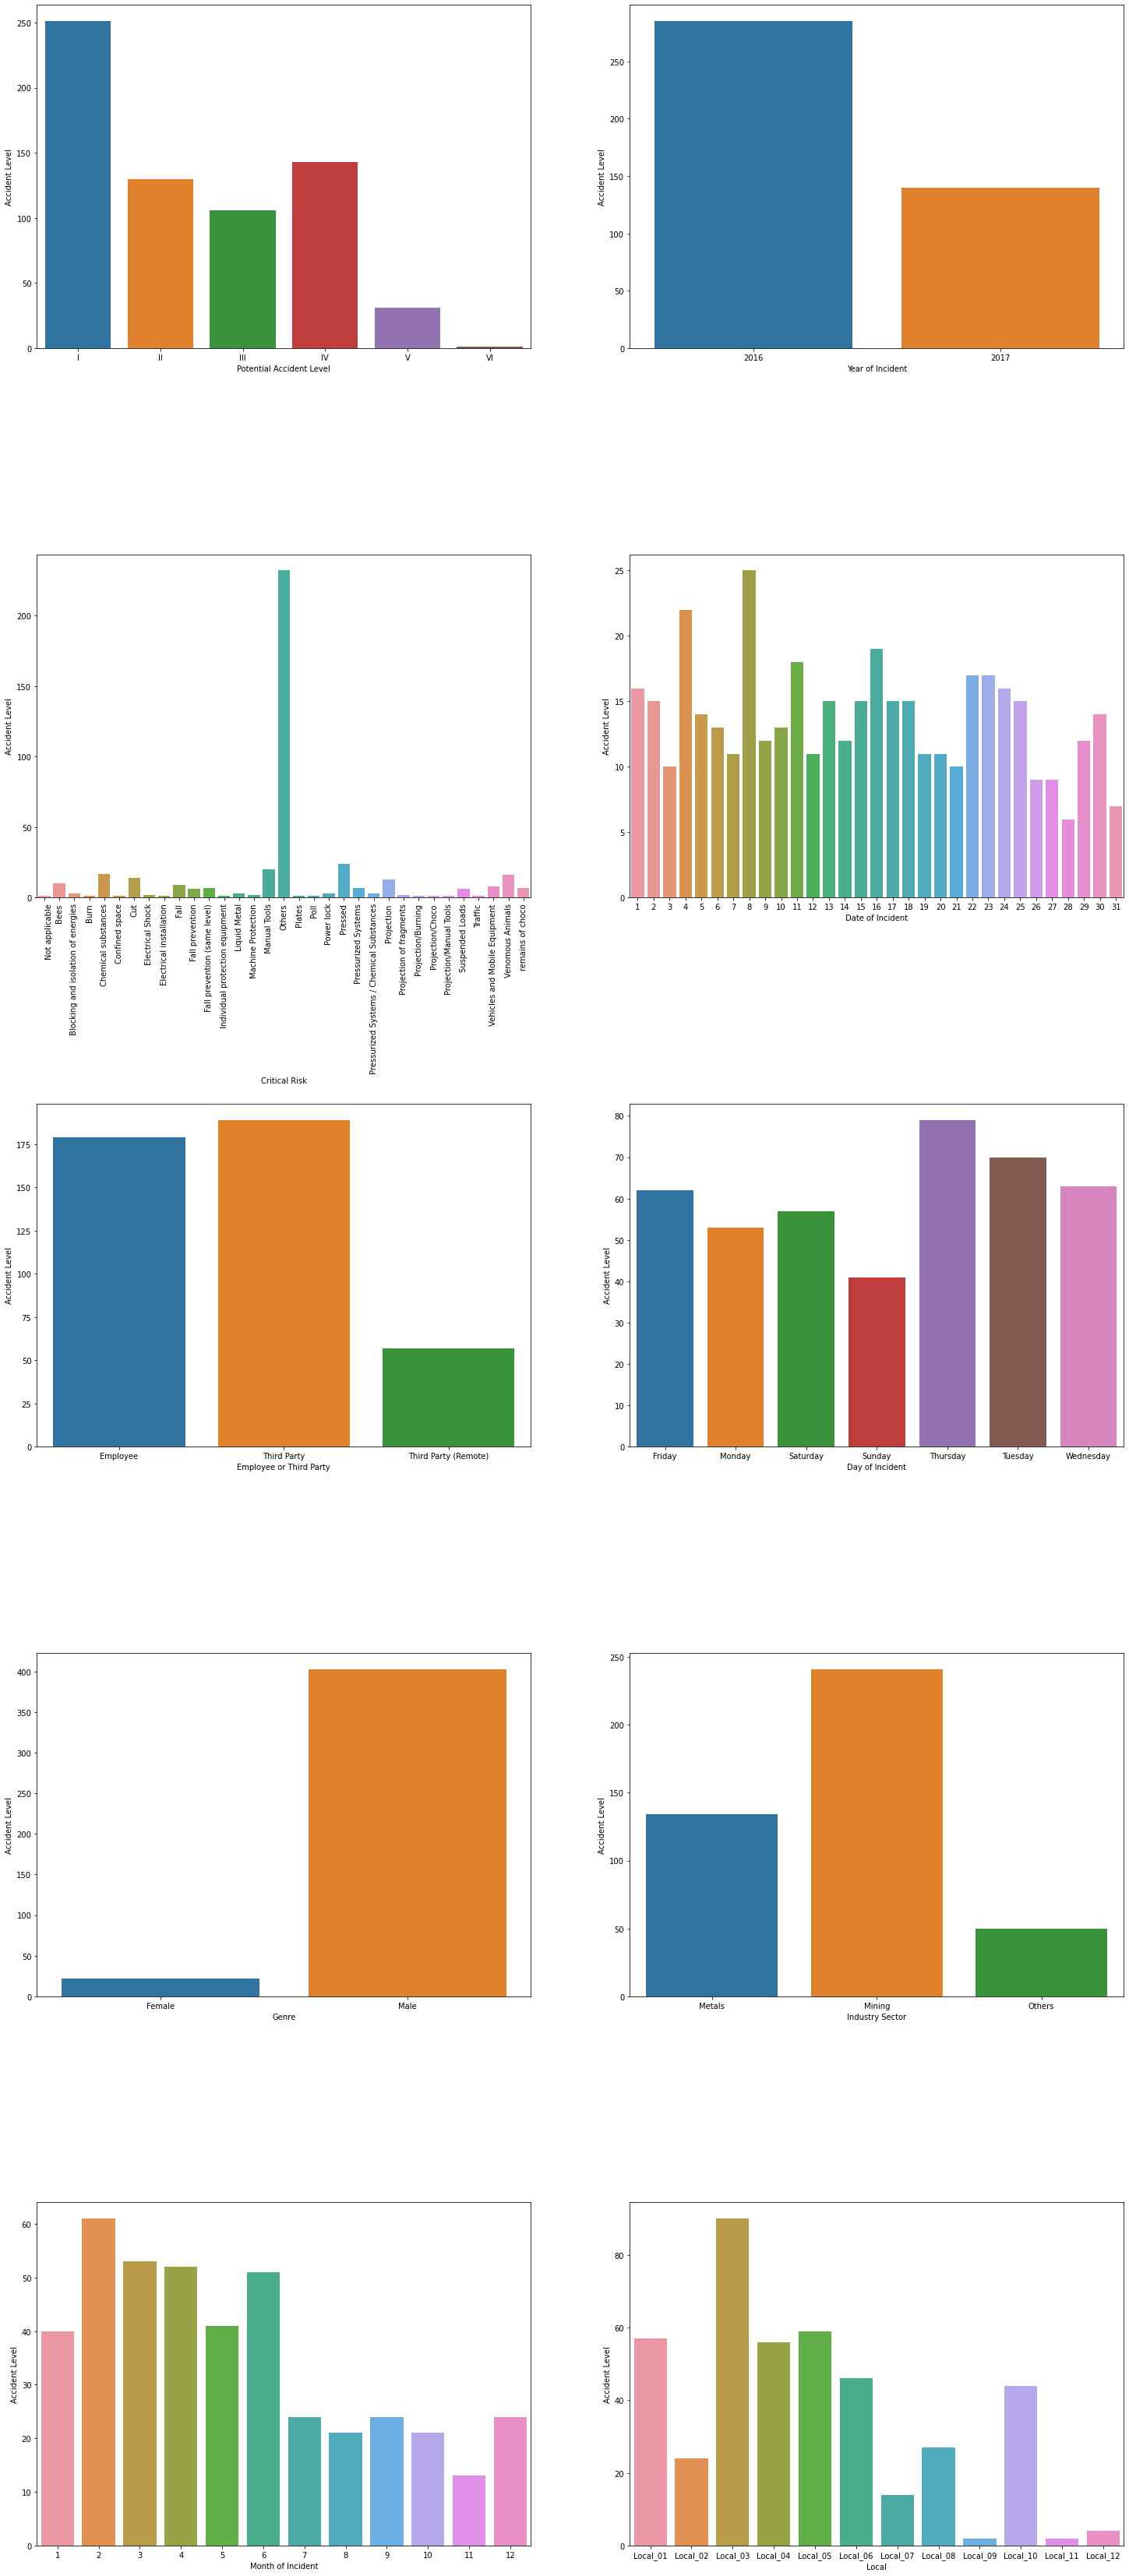

In [23]:
fig,ax = plt.subplots(int(len(bivariate_analysis_columns)/2),int(len(bivariate_analysis_columns)/5),figsize=(25,60))
plt.subplots_adjust(hspace=0.6)
c1=0
c2=0
flag=0
for i in range(0,len(bivariate_analysis_columns)):
  if bivariate_analysis_columns[i]== 'Critical Risk':
    g=sns.barplot(x=bivariate_analysis_columns[i], y='Accident Level',data=dataframe.groupby(bivariate_analysis_columns[i]).count().reset_index(),ax=ax[c1,c2])
    g.set_xticklabels(ax[c1,c2].get_xticklabels(),rotation=90)
    # g.subplots_adjust(hspace=0.9)
  else:
    g=sns.barplot(x=bivariate_analysis_columns[i], y='Accident Level',data=dataframe.groupby(bivariate_analysis_columns[i]).count().reset_index(),ax=ax[c1,c2])

  ax[c1,c2].set_xlabel(bivariate_analysis_columns[i])
  if bivariate_analysis_columns[i]== 'Local':
    g.set_xticklabels(ax[c1,c2].get_xticklabels(),rotation=0)
  if flag==0:
    c1=c1+1
    c1=c1%5
    flag=1
  else:
    c2=c2+1
    c2=c2%2
    flag=0

In [24]:
dataframe

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Unix Time,Date of Incidents,Year of Incident,Month of Incident,Date of Incident,Day of Incident
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,1.451606e+09,2016-01-01,2016,1,1,Friday
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,1.451693e+09,2016-01-02,2016,1,2,Saturday
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,1.452038e+09,2016-01-06,2016,1,6,Wednesday
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,1.452211e+09,2016-01-08,2016,1,8,Friday
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,1.452384e+09,2016-01-10,2016,1,10,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w...",1.499126e+09,2017-07-04,2017,7,4,Tuesday
421,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...,1.499126e+09,2017-07-04,2017,7,4,Tuesday
422,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...,1.499213e+09,2017-07-05,2017,7,5,Wednesday
423,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...,1.499299e+09,2017-07-06,2017,7,6,Thursday


In [25]:
dataframe.groupby(bivariate_analysis_columns[0]).count().reset_index()

,Countries,Data,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description,Unix Time,Date of Incidents,Year of Incident,Month of Incident,Date of Incident,Day of Incident
0,Country_01,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251
1,Country_02,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130
2,Country_03,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44


In [26]:
# Relationship between countries and accident level:
# 1. Maximum number of accidents in country 1
# Relationship between local and accident level:
# 1. Maximum number of accidents in local 3

In [27]:
df.groupby(categorical_columns[0]).count().reset_index()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,1,1,1,1,1,1,1,1,1
1,2016-01-02 00:00:00,1,1,1,1,1,1,1,1,1
2,2016-01-06 00:00:00,1,1,1,1,1,1,1,1,1
3,2016-01-08 00:00:00,1,1,1,1,1,1,1,1,1
4,2016-01-10 00:00:00,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
282,2017-06-29 00:00:00,1,1,1,1,1,1,1,1,1
283,2017-07-04 00:00:00,2,2,2,2,2,2,2,2,2
284,2017-07-05 00:00:00,1,1,1,1,1,1,1,1,1
285,2017-07-06 00:00:00,1,1,1,1,1,1,1,1,1


In [28]:
temp_data_holder=[]
for i in list(set(df['Countries'])):
  temp=pd.DataFrame(df.groupby('Countries').get_group(i).groupby('Accident Level').count().reset_index()[['Countries','Accident Level']])
  temp.columns=[i,'Accident Level']
  temp_data_holder.append(temp)  

In [29]:
temp=temp_data_holder[0].set_index('Accident Level').join(temp_data_holder[1].set_index('Accident Level'),how='outer').reset_index().set_index('Accident Level').join(temp_data_holder[2].set_index('Accident Level'),how='outer').reset_index()
print(temp)
temp=temp.T
headers=list(temp.iloc[0])
temp.drop(['Accident Level'],inplace=True)
temp.columns=headers
temp=temp.fillna(0)
temp

  Accident Level  Country_03  Country_02  Country_01
0              I        37.0        99.0         180
1             II         2.0        19.0          19
2            III         3.0         7.0          21
3             IV         2.0         5.0          23
4              V         NaN         NaN           8


,I,II,III,IV,V
Country_03,37.0,2.0,3.0,2.0,0
Country_02,99.0,19.0,7.0,5.0,0
Country_01,180.0,19.0,21.0,23.0,8


In [31]:
pd.DataFrame(df.groupby('Countries').get_group('Country_01').groupby('Accident Level').count().reset_index()[['Countries','Accident Level']])
# .rename(columns=['Countries_Country_2,Accident_Level_Country_2'])

,Countries,Accident Level
0,180,I
1,19,II
2,21,III
3,23,IV
4,8,V


In [32]:
pd.DataFrame(df.groupby('Countries').get_group('Country_02').groupby('Accident Level').count().reset_index()[['Countries','Accident Level']])
# .rename(columns=['Countries_Country_2,Accident_Level_Country_2'])

,Countries,Accident Level
0,99,I
1,19,II
2,7,III
3,5,IV


In [33]:
pd.DataFrame(df.groupby('Countries').get_group('Country_03').groupby('Accident Level').count().reset_index()[['Countries','Accident Level']])

,Countries,Accident Level
0,37,I
1,2,II
2,3,III
3,2,IV


In [34]:
df.groupby('Accident Level').count()

,Data,Countries,Local,Industry Sector,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
Accident Level,,,,,,,,,
I,316,316,316,316,316,316,316,316,316
II,40,40,40,40,40,40,40,40,40
III,31,31,31,31,31,31,31,31,31
IV,30,30,30,30,30,30,30,30,30
V,8,8,8,8,8,8,8,8,8


In [35]:
df.groupby('Countries').get_group('Country_02').groupby('Accident Level').count()

,Data,Countries,Local,Industry Sector,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
Accident Level,,,,,,,,,
I,99,99,99,99,99,99,99,99,99
II,19,19,19,19,19,19,19,19,19
III,7,7,7,7,7,7,7,7,7
IV,5,5,5,5,5,5,5,5,5


In [36]:
df.groupby('Countries').get_group('Country_03').groupby('Accident Level').count()

,Data,Countries,Local,Industry Sector,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
Accident Level,,,,,,,,,
I,37,37,37,37,37,37,37,37,37
II,2,2,2,2,2,2,2,2,2
III,3,3,3,3,3,3,3,3,3
IV,2,2,2,2,2,2,2,2,2


Relationship Between Critical Risk and Accident Level

In [37]:
list_of_critical_groups=pd.DataFrame(df['Critical Risk'].value_counts()).reset_index().iloc[:,0].values

In [38]:
pd.DataFrame(df['Critical Risk'].value_counts()).reset_index().iloc[:,0].values

array(['Others', 'Pressed', 'Manual Tools', 'Chemical substances',
       'Venomous Animals', 'Cut', 'Projection', 'Bees', 'Fall',
       'Vehicles and Mobile Equipment', 'remains of choco',
       'Fall prevention (same level)', 'Pressurized Systems',
       'Suspended Loads', 'Fall prevention',
       'Blocking and isolation of energies', 'Liquid Metal',
       'Pressurized Systems / Chemical Substances', 'Power lock',
       'Electrical Shock', 'Machine Protection',
       'Projection of fragments', 'Individual protection equipment',
       '\nNot applicable', 'Projection/Manual Tools', 'Projection/Choco',
       'Electrical installation', 'Traffic', 'Projection/Burning',
       'Confined space', 'Plates', 'Burn', 'Poll'], dtype=object)

# **# MULTIVARIATE ANALYSIS**



In [39]:
multivariate_analysis_columns=univariate_analysis_columns.copy()
multivariate_analysis_columns.append('Accident Level')
multivariate_analysis_columns.remove('Date of Incidents')
multivariate_analysis_columns.remove('Critical Risk')
dataframe[multivariate_analysis_columns]

,Countries,Local,Industry Sector,Potential Accident Level,Genre,Employee or Third Party,Accident Level
0,Country_01,Local_01,Mining,IV,Male,Third Party,I
1,Country_02,Local_02,Mining,IV,Male,Employee,I
2,Country_01,Local_03,Mining,III,Male,Third Party (Remote),I
3,Country_01,Local_04,Mining,I,Male,Third Party,I
4,Country_01,Local_04,Mining,IV,Male,Third Party,IV
...,...,...,...,...,...,...,...
420,Country_01,Local_04,Mining,III,Male,Third Party,I
421,Country_01,Local_03,Mining,II,Female,Employee,I
422,Country_02,Local_09,Metals,II,Male,Employee,I
423,Country_02,Local_05,Metals,II,Male,Employee,I


In [40]:
multivariate_analysis_dataframe=pd.DataFrame(dataframe[multivariate_analysis_columns])
columns_to_label_encode=['Countries', 'Industry Sector','Genre','Employee or Third Party']
for i in columns_to_label_encode:
  le=LabelEncoder()
  multivariate_analysis_dataframe[i]=le.fit_transform(dataframe[i])

In [41]:
columns_to_ordinal_encode=['Accident Level', 'Potential Accident Level']
for i in columns_to_ordinal_encode:
  oe=OrdinalEncoder()
  multivariate_analysis_dataframe[i]=oe.fit_transform(dataframe[i].values.reshape(-1,1))

In [42]:
columns_to_binary_encode=['Local']
be=BinaryEncoder(cols=columns_to_binary_encode)
multivariate_analysis_dataframe=be.fit_transform(multivariate_analysis_dataframe)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


<Figure size 1440x1440 with 0 Axes>

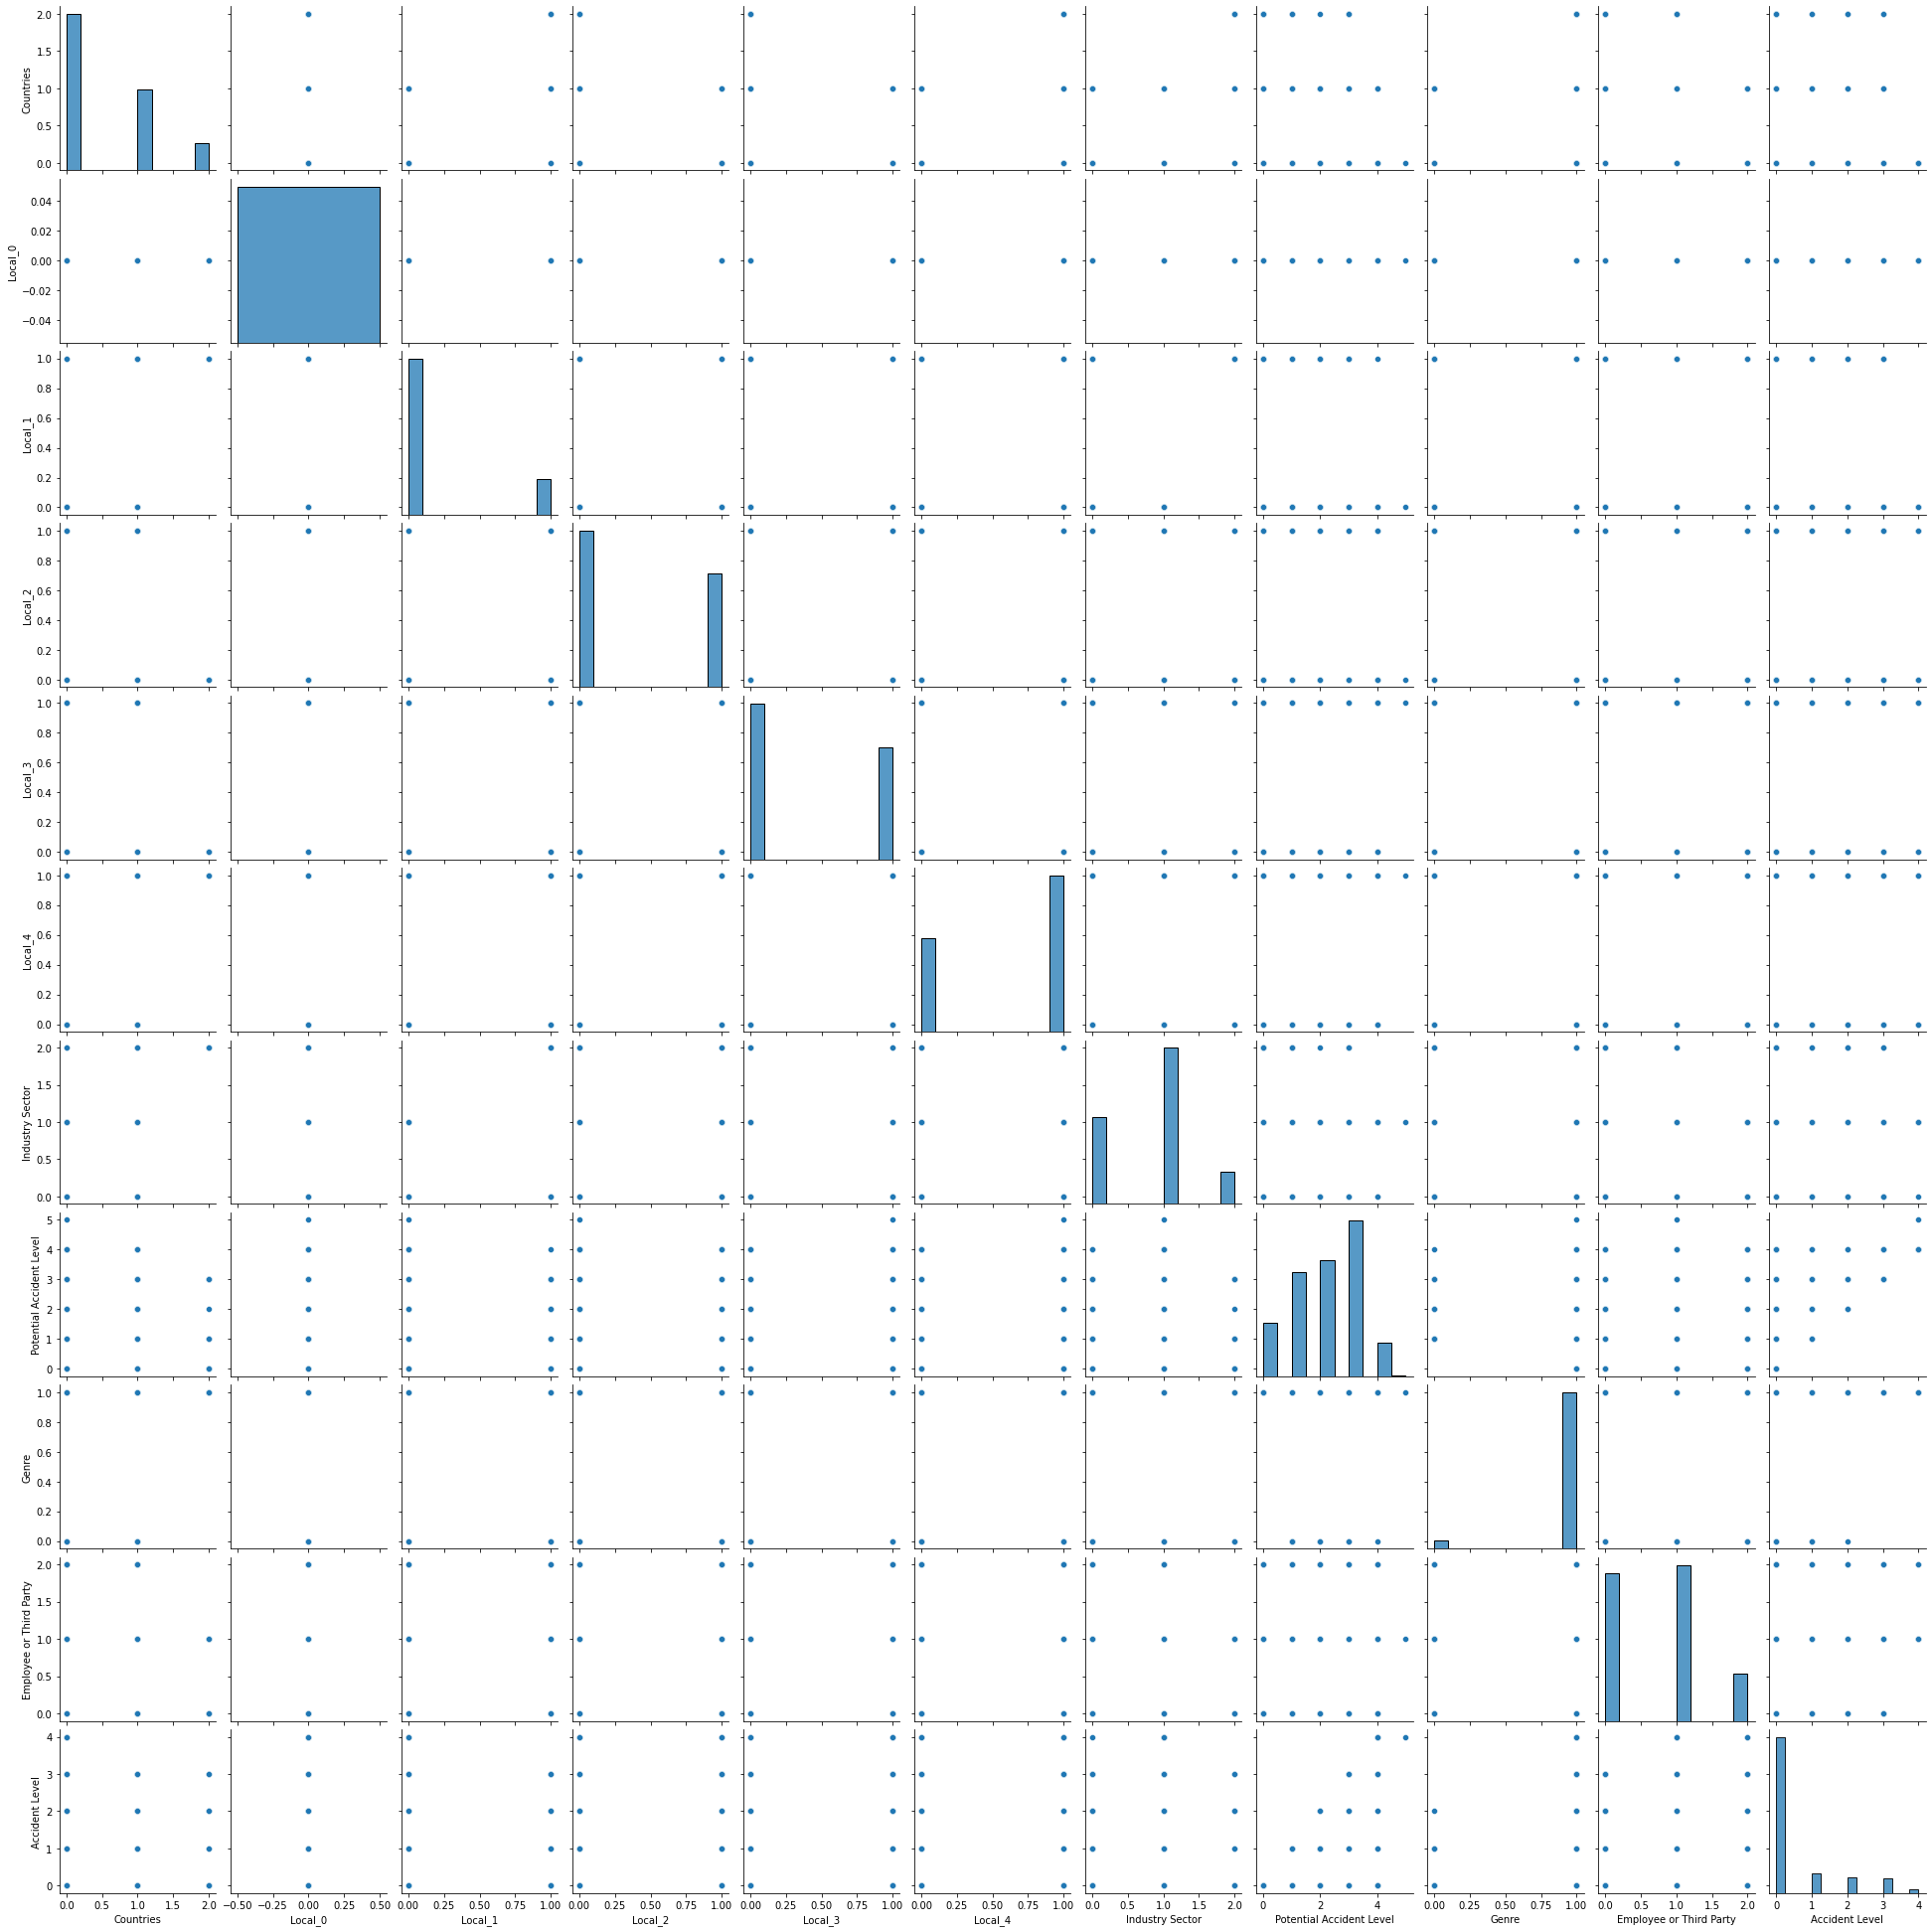

In [43]:
plt.figure(figsize=(20,20))
sns.pairplot(multivariate_analysis_dataframe)

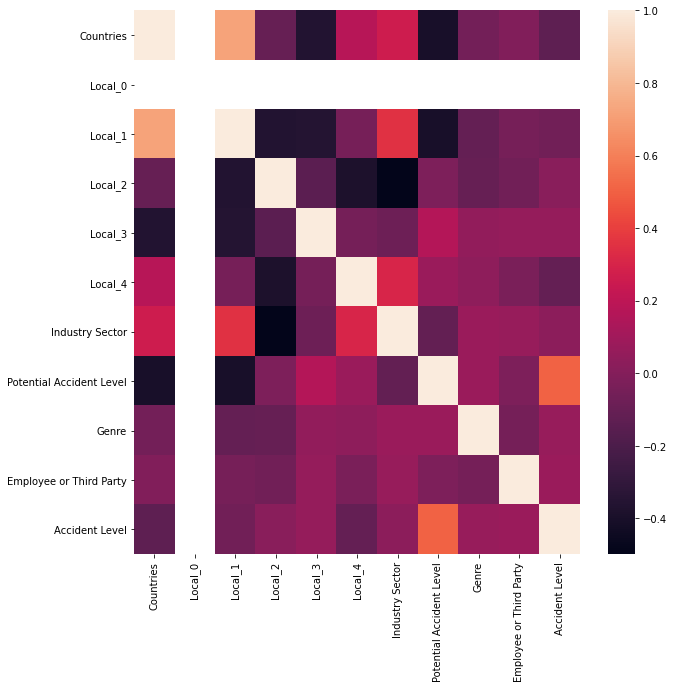

In [44]:
plt.figure(figsize=(10,10))
sns.heatmap(multivariate_analysis_dataframe.corr())

In [45]:
multivariate_analysis_columns

['Countries',
 'Local',
 'Industry Sector',
 'Potential Accident Level',
 'Genre',
 'Employee or Third Party',
 'Accident Level']

In [46]:
multivariate_analysis_dataframe

,Countries,Local_0,Local_1,Local_2,Local_3,Local_4,Industry Sector,Potential Accident Level,Genre,Employee or Third Party,Accident Level
0,0,0,0,0,0,1,1,3.0,1,1,0.0
1,1,0,0,0,1,0,1,3.0,1,0,0.0
2,0,0,0,0,1,1,1,2.0,1,2,0.0
3,0,0,0,1,0,0,1,0.0,1,1,0.0
4,0,0,0,1,0,0,1,3.0,1,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...
420,0,0,0,1,0,0,1,2.0,1,1,0.0
421,0,0,0,0,1,1,1,1.0,0,0,0.0
422,1,0,1,0,1,0,0,1.0,1,0,0.0
423,1,0,0,1,0,1,0,1.0,1,0,0.0


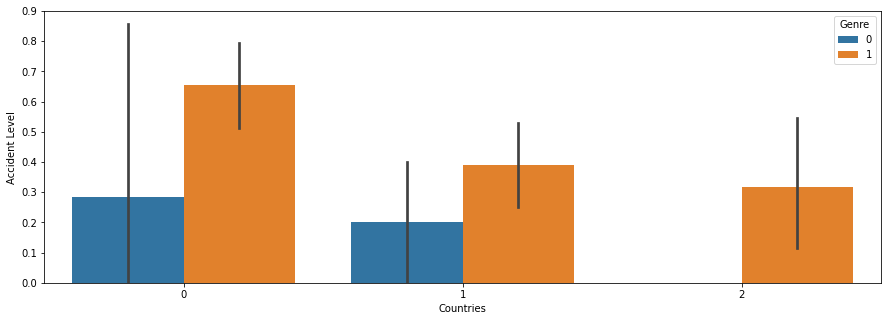

In [47]:
plt.figure(figsize=(15,5))
sns.barplot(x='Countries',y='Accident Level',hue='Genre',data=multivariate_analysis_dataframe)

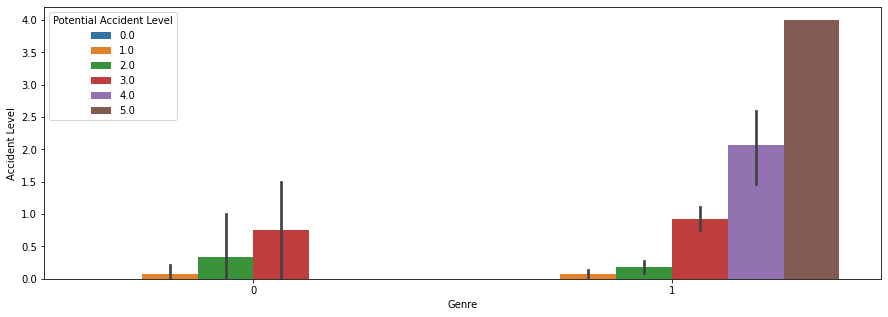

In [48]:
plt.figure(figsize=(15,5))
sns.barplot(y='Accident Level',hue='Potential Accident Level',x='Genre',data=multivariate_analysis_dataframe)

# **# PRE-PROCESSING DATA**

Cleaning Data for Machine Learning Modelling


Creating Word Embedding on Description Column

In [49]:
stop_words = stopwords.words('english')
punctuations = list(string.punctuation)
stop_words += punctuations  
def groupwise_embeddings(dataframe):
  count_vec=CountVectorizer(max_features=10,ngram_range=(1,4),stop_words=stop_words)
  words=[]
  # print(dataframe['Description'][0])
  for i in range(0,len(dataframe['Description'])):
    # print(dataframe['Description'][i])
    words.append(" ".join([w for w in word_tokenize(dataframe['Description'][i]) if not w in stop_words]))
  words_transformed=count_vec.fit_transform(words)
  return count_vec.get_feature_names()

In [50]:
critical_risk_words_per_group=[]
for i in range(0,len(list_of_critical_groups)):
  critical_risk_words_per_group.append(groupwise_embeddings(df.groupby('Critical Risk').get_group(list_of_critical_groups[i]).reset_index()))

In [51]:
temp=[]
for i in critical_risk_words_per_group:
  temp.append(" ".join(i))

In [52]:
count_vec_final=CountVectorizer(ngram_range=(1,4),stop_words=stop_words)
len(count_vec_final.fit_transform(temp).todense())

33

In [53]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(count_vec_final.fit_transform(temp).todense())

In [54]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0], dtype=int32)

In [55]:
df.groupby('Critical Risk').get_group(list_of_critical_groups[0])

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
8,2016-01-19 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Third Party (Remote),Others,Employee was sitting in the resting area at le...
10,2016-01-28 00:00:00,Country_01,Local_03,Mining,I,III,Male,Employee,Others,While installing a segment of the polyurethane...
11,2016-01-30 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Third Party,Others,While preparing the rice for the lunch of the ...
...,...,...,...,...,...,...,...,...,...,...
415,2017-06-23 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Others,Employee reports that by removing the zinc she...
416,2017-06-19 00:00:00,Country_03,Local_10,Others,III,IV,Male,Third Party,Others,During the execution of the task of assembling...
417,2017-06-22 00:00:00,Country_03,Local_10,Others,I,IV,Male,Employee,Others,The technician was returning from his activiti...
420,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."


In [56]:
critical_risk_words_per_group[4]

['activity',
 'bites',
 'da',
 'da silva',
 'employee',
 'one',
 'silva',
 'site',
 'took',
 'took bites']

In [57]:
df.groupby('Critical Risk').get_group(list_of_critical_groups[1])

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
7,2016-01-17 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic..."
35,2016-02-18 00:00:00,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Pressed,When replacing the telescopic expansion joint ...
43,2016-03-02 00:00:00,Country_02,Local_08,Metals,I,III,Male,Employee,Pressed,"The operator was in the center (Demag IV), per..."
58,2016-03-10 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Pressed,The employee reports that when he lowered the ...
72,2016-03-31 00:00:00,Country_02,Local_08,Metals,I,III,Male,Third Party (Remote),Pressed,"The employee, performing the truck's unloading..."
84,2016-04-05 00:00:00,Country_02,Local_05,Metals,I,III,Male,Third Party,Pressed,Employee reports that when handling the air co...
103,2016-04-30 00:00:00,Country_02,Local_05,Metals,I,IV,Male,Employee,Pressed,The employee performed the return of the load ...
163,2016-07-04 00:00:00,Country_01,Local_06,Metals,III,IV,Male,Third Party,Pressed,"At 11:00 a.m., Mr. Frank with the support of a..."
195,2016-08-22 00:00:00,Country_02,Local_05,Metals,I,III,Male,Employee,Pressed,The employee was performing cutting activity o...


In [58]:
! pip install wordcloud

In [59]:
stop_words = stopwords.words('english')
punctuations = list(string.punctuation)
stop_words += punctuations  
from wordcloud import WordCloud, STOPWORDS

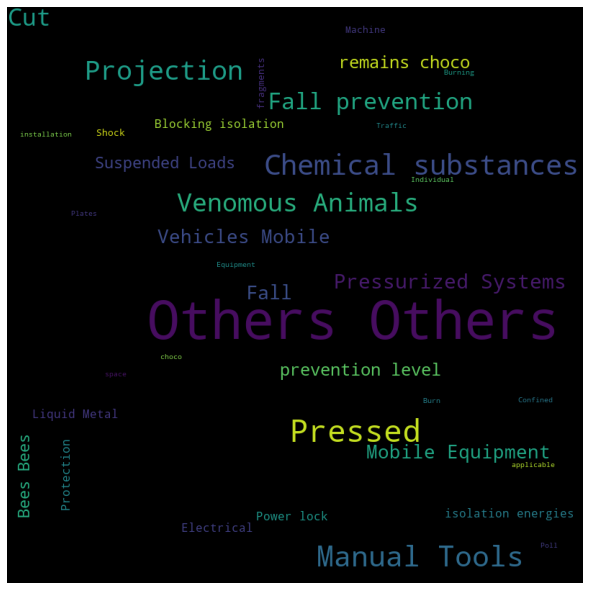

In [60]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = set(stop_words+list(STOPWORDS)), 
                min_font_size = 10).generate(" ".join(dataframe["Critical Risk"].values)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

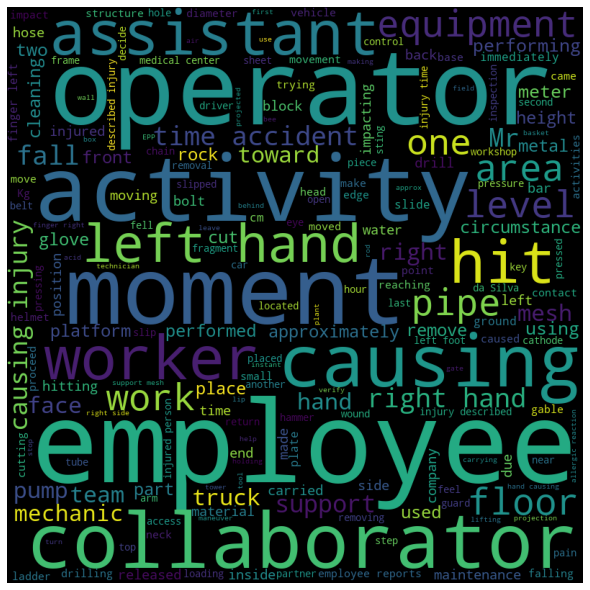

In [61]:


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = set(stop_words+list(STOPWORDS)), 
                min_font_size = 10).generate(" ".join(dataframe["Description"].values)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 